In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

#Ma'lumotlarni o'qish

In [23]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"
df = pd.read_excel(url, sheet_name="E Comm")
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [24]:
description = pd.read_excel(url, sheet_name="Data Dict", header=1, usecols=[1,2,3])
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


#Ma'lumotlarni tahlil qilish

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [26]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [27]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [28]:
df['Churn'].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

In [29]:
churn_rate = df['Churn'].value_counts()/len(df)*100

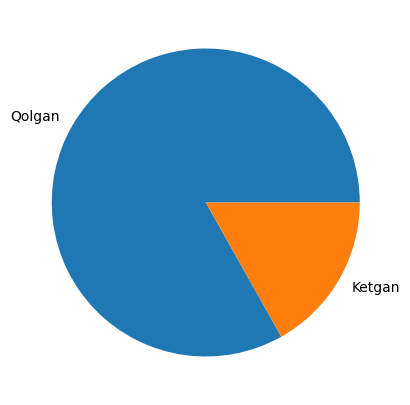

In [30]:
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Qolgan','Ketgan'])
plt.show()

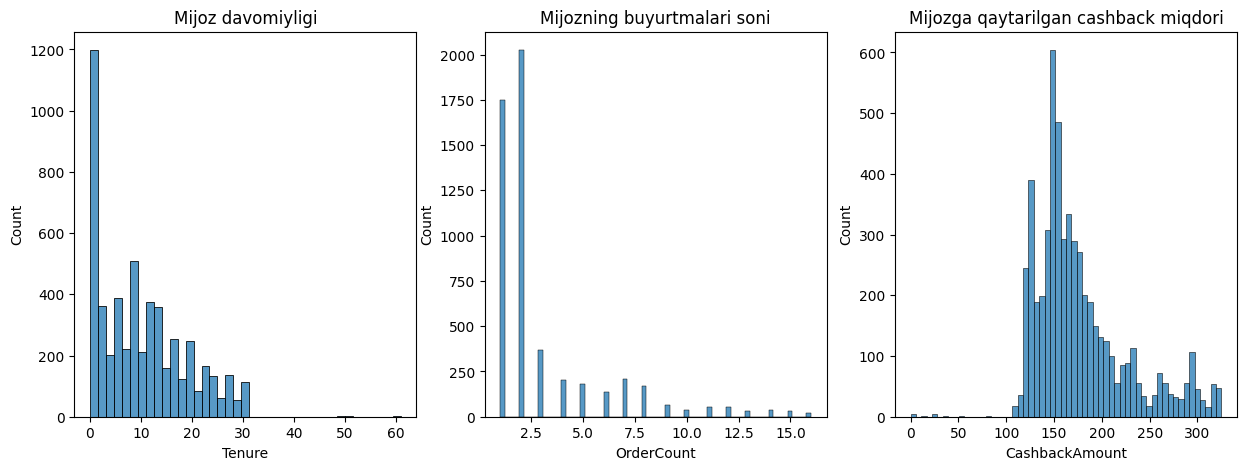

In [31]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Tenure
sns.histplot(x="Tenure", data=df, ax=axes[0])
axes[0].set_title("Mijoz davomiyligi")

#OrderCount
sns.histplot(x="OrderCount", data=df, ax=axes[1])
axes[1].set_title("Mijozning buyurtmalari soni")

# Cashback
sns.histplot(x="CashbackAmount", data=df, ax=axes[2])
axes[2].set_title("Mijozga qaytarilgan cashback miqdori")

plt.show()

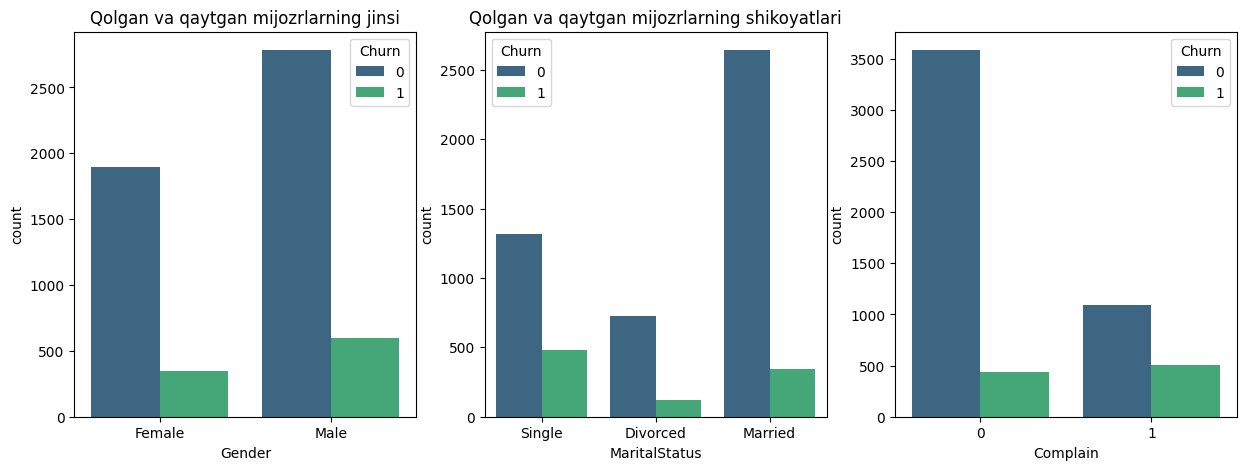

In [32]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozrlarning jinsi")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozrlarning oilaviy xolati")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[1].set_title("Qolgan va qaytgan mijozrlarning shikoyatlari")

plt.show()

#Ma'lumotlarga ishlov berish

In [33]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [34]:
df.drop('CustomerID', axis=1, inplace=True)

In [35]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [36]:
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [37]:
pd.get_dummies(df)

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,False,False,False,True,False,False,False,False,False,True
1,1,NaN,1,8.0,3.0,4,3,7,1,15.0,...,True,False,False,False,True,False,False,False,False,True
2,1,NaN,1,30.0,2.0,4,3,6,1,14.0,...,True,False,False,False,True,False,False,False,False,True
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,True,False,False,True,False,False,False,False,False,True
4,1,0.0,1,12.0,NaN,3,5,3,0,11.0,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,1,30.0,3.0,2,1,6,0,18.0,...,True,False,False,True,False,False,False,False,True,False
5626,0,13.0,1,13.0,3.0,5,5,6,0,16.0,...,True,True,False,False,False,False,False,False,True,False
5627,0,1.0,1,11.0,3.0,2,4,3,1,21.0,...,True,False,False,True,False,False,False,False,True,False
5628,0,23.0,3,9.0,4.0,5,4,4,0,15.0,...,True,False,False,True,False,False,False,False,True,False


In [38]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [48]:
enc = LabelEncoder()
df['PreferredLoginDevice'] = enc.fit_transform(df['PreferredLoginDevice'])
df['PreferredPaymentMode'] = enc.fit_transform(df['PreferredPaymentMode'])
df['Gender'] = enc.fit_transform(df['Gender'])
df['PreferedOrderCat'] = enc.fit_transform(df['PreferedOrderCat'])
df['MaritalStatus'] = enc.fit_transform(df['MaritalStatus'])
df['PreferredPaymentMode'] = enc.fit_transform(df['PreferredPaymentMode'])
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,2,1,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,2,1,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,2,1,12.0,0,1,NaN,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,0,1,30.0,3,1,3.0,2,2,1,1,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,1,1,13.0,3,1,3.0,5,0,5,1,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,1,1,11.0,4,1,3.0,2,2,4,1,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,0,3,9.0,3,1,4.0,5,2,4,1,4,0,15.0,2.0,2.0,9.0,178.90


In [49]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
MaritalStatus                  0.140316
PreferedOrderCat               0.118922
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
Gender                         0.029264
OrderCount                     0.028697
PreferredPaymentMode           0.026519
HourSpendOnApp                 0.018675
PreferredLoginDevice           0.013281
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   int64  
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   int64  
 6   Gender                       5630 non-null   int64  
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   int64  
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   int64  
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [51]:
df.isnull().sum().sum()*100/df.shape[0]

32.96625222024867

In [59]:
df.isnull().sum()

Churn                         0
Tenure                      264
PreferredLoginDevice          0
CityTier                      0
PreferredPaymentMode          0
Gender                        0
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           307
CashbackAmount                0
dtype: int64

In [54]:
df.drop(['CouponUsed', 'OrderAmountHikeFromlastYear', 'HourSpendOnApp', 'OrderCount'], axis=1, inplace=True)

In [57]:
df.drop('WarehouseToHome', axis=1, inplace=True)

In [58]:
df.isnull().sum().sum()*100/df.shape[0]

10.142095914742452

In [60]:
df.dropna(inplace=True)

In [61]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,4,0,3,2,2,2,9,1,5.0,159.93
3,1,0.0,2,3,4,1,4,2,5,2,8,0,3.0,134.07
4,1,0.0,2,1,0,1,3,3,5,2,3,0,3.0,129.60
5,1,0.0,0,1,4,0,5,4,5,2,2,1,7.0,139.19
8,1,13.0,2,3,5,1,4,3,3,0,2,1,2.0,126.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,0,1.0,1,3,6,0,5,4,3,2,2,0,1.0,154.66
5625,0,10.0,0,1,3,1,2,2,1,1,6,0,4.0,150.71
5627,0,1.0,1,1,4,1,2,2,4,1,3,1,4.0,186.42
5628,0,23.0,0,3,3,1,5,2,4,1,4,0,9.0,178.90


In [64]:
df['Churn'].value_counts()/len(df)

Churn
0    0.839296
1    0.160704
Name: count, dtype: float64

In [65]:
X = df.drop('Churn', axis=1)
Y = df['Churn']

In [66]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [67]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=47)

#Machine Learning
Logistic Regression

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       849
           1       0.71      0.47      0.57       163

    accuracy                           0.88      1012
   macro avg       0.81      0.72      0.75      1012
weighted avg       0.87      0.88      0.87      1012

Model aniqligi: 0.883399209486166


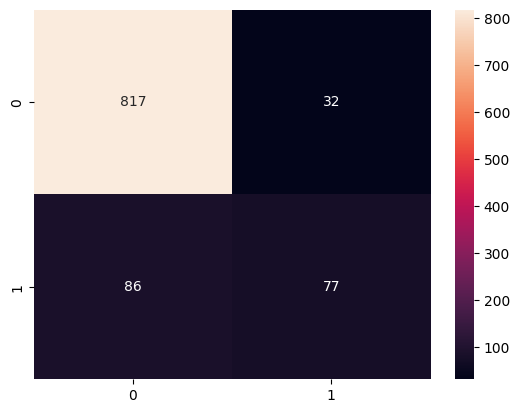

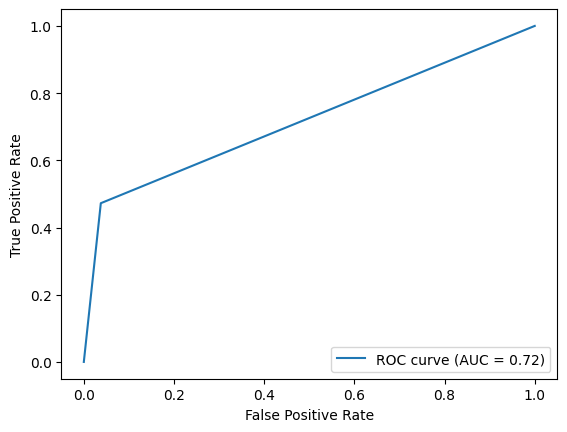

In [68]:
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       849
           1       0.88      0.88      0.88       163

    accuracy                           0.96      1012
   macro avg       0.93      0.93      0.93      1012
weighted avg       0.96      0.96      0.96      1012

Model aniqligi: 0.9614624505928854


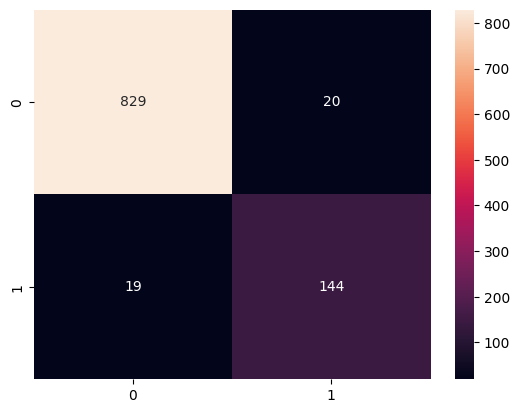

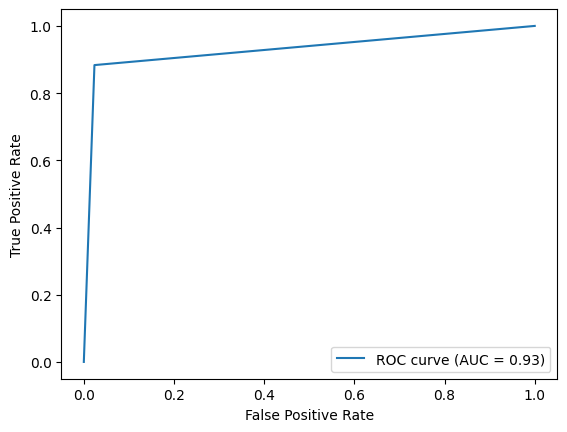

In [69]:
# Modelni yaratamiz (training)
Tree_model = DecisionTreeClassifier()
Tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = Tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Random Forest

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       849
           1       0.95      0.88      0.91       163

    accuracy                           0.97      1012
   macro avg       0.96      0.93      0.95      1012
weighted avg       0.97      0.97      0.97      1012

Model aniqligi: 0.9723320158102767


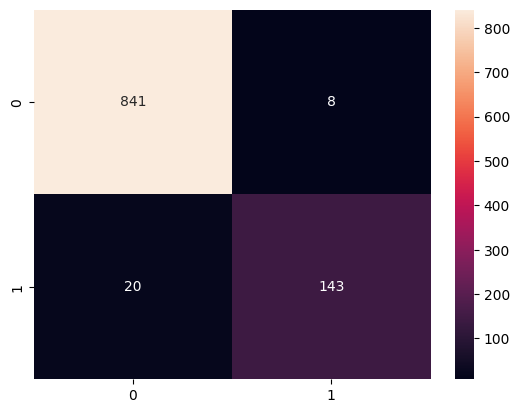

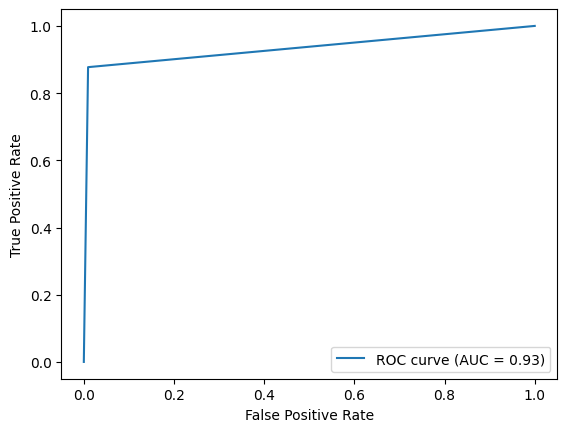

In [72]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

XGBoost

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       849
           1       0.94      0.87      0.90       163

    accuracy                           0.97      1012
   macro avg       0.96      0.93      0.94      1012
weighted avg       0.97      0.97      0.97      1012

Model aniqligi: 0.9703557312252964


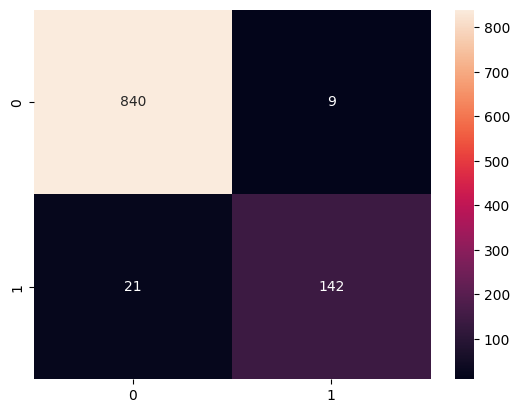

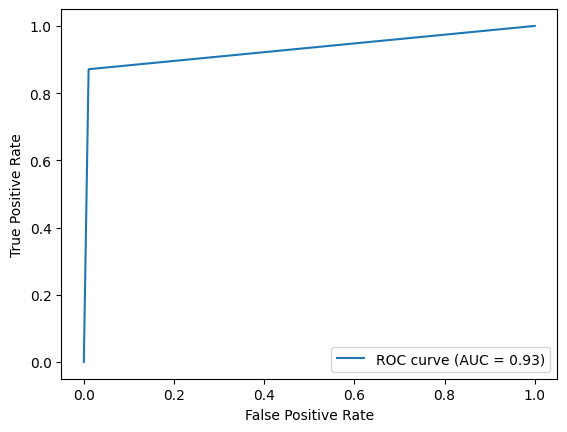

In [73]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       849
           1       0.87      0.82      0.85       163

    accuracy                           0.95      1012
   macro avg       0.92      0.90      0.91      1012
weighted avg       0.95      0.95      0.95      1012

Model aniqligi: 0.9515810276679841


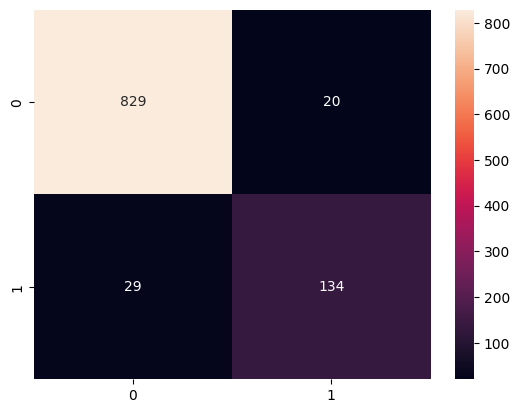

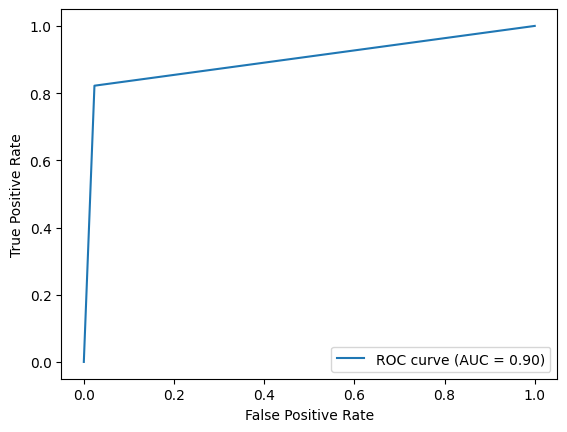

In [79]:
# Modelni yaratamiz (training)
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = knn_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

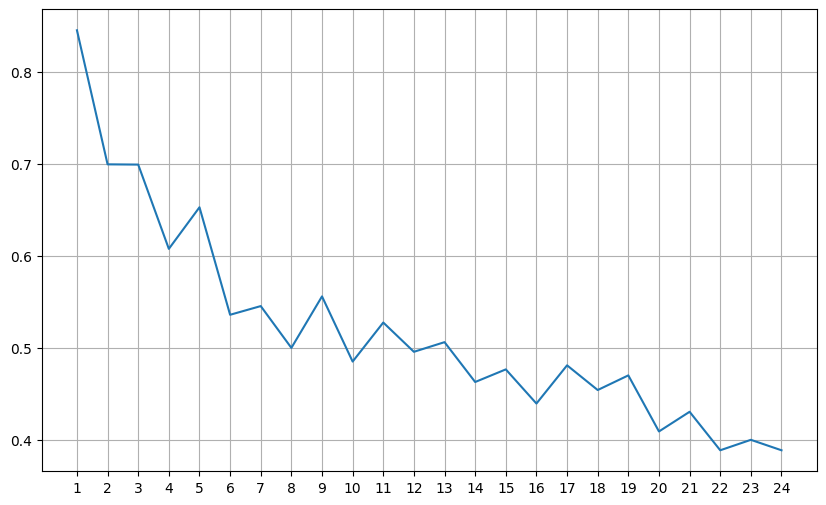

In [78]:
f1 = []
for k in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn2.fit(X_train, y_train)
    y_predict = knn2.predict(X_test)
    f1.append(metrics.f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()